In [2]:
import onnx
import numpy as np
from onnx import helper, TensorProto

# Define the input tensor
input_tensor = helper.make_tensor_value_info('input', TensorProto.FLOAT, [1, 3, 224, 224])

# Define the output tensor
output_tensor = helper.make_tensor_value_info('output', TensorProto.FLOAT, [1, 64, 112, 112])

# Define the weights tensor for the convolutional layer
weights = np.random.randn(64, 3, 3, 3).astype(np.float32)
weights_tensor = helper.make_tensor('conv1_W', TensorProto.FLOAT, [64, 3, 3, 3], weights.flatten())

# Define the convolutional layer
conv_node = helper.make_node(
    'Conv',
    inputs=['input', 'conv1_W'],
    outputs=['conv1'],
    kernel_shape=[3, 3],
    pads=[1, 1, 1, 1],
    strides=[2, 2]
)

# Define the ReLU activation function
relu_node = helper.make_node(
    'Relu',
    inputs=['conv1'],
    outputs=['output']
)

# Create the graph
graph = helper.make_graph(
    [conv_node, relu_node],
    'test_graph',
    [input_tensor],
    [output_tensor],
    [weights_tensor]
)

# Create the model
model = helper.make_model(graph, producer_name='onnx-example')

# Save the model to a file
with open('model.onnx', 'wb') as f:
    f.write(model.SerializeToString())

  Obtaining dependency information for onnxruntime from https://files.pythonhosted.org/packages/88/4f/20c4384e742d44caaa3c6cf39dfde2b863079e008eafbfdcc63a8c670589/onnxruntime-1.18.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 5.6 MB/s eta 0:00:0000:0100:01


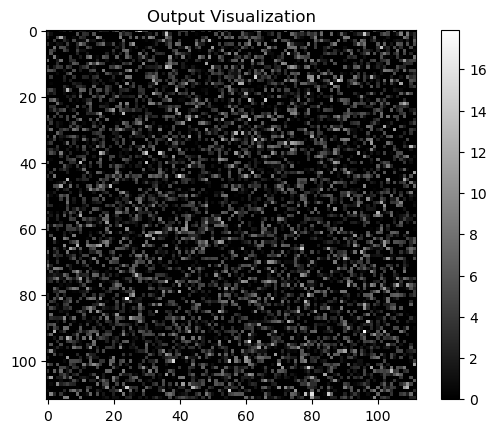

In [3]:
!pip install onnxruntime
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'model.onnx'
session = ort.InferenceSession(model_path)

# Get the input name for the model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Create a random input tensor
input_tensor = np.random.randn(1, 3, 224, 224).astype(np.float32)

# Run the model on the input tensor
result = session.run([output_name], {input_name: input_tensor})

# Extract the output tensor
output_tensor = result[0]

# Visualize the output tensor
# Here we assume that the output tensor is an image-like tensor.
# If your output tensor represents something else, you will need to adjust the visualization accordingly.
# For simplicity, we'll visualize the first channel of the output tensor.
output_image = output_tensor[0, 0, :, :]

plt.imshow(output_image, cmap='gray')
plt.title('Output Visualization')
plt.colorbar()
plt.show()

Files already downloaded and verified


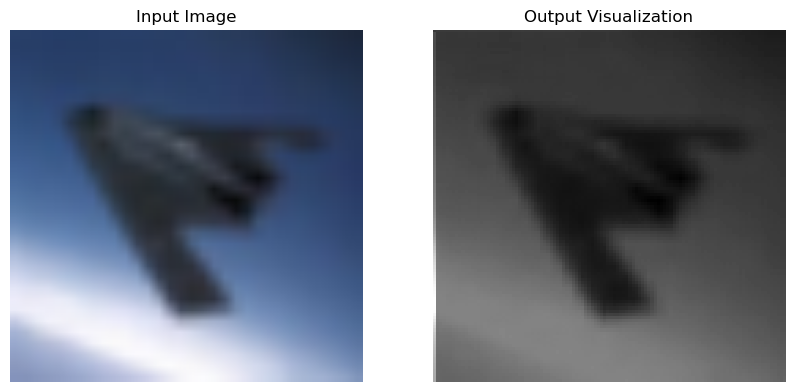

In [7]:

import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch

# Download and preprocess the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match the model's input size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

cifar10 = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=1, shuffle=True)

# Get a single batch (one image)
data_iter = iter(dataloader)
image, label = next(data_iter)

# Convert the image to a NumPy array and add batch dimension
input_tensor = image.numpy()

# Load the ONNX model
model_path = 'model.onnx'
session = ort.InferenceSession(model_path)

# Get the input name for the model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Run the model on the input tensor
result = session.run([output_name], {input_name: input_tensor})

# Extract the output tensor
output_tensor = result[0]

# Visualize the input image and the output tensor
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Input image
ax[0].imshow(image[0].permute(1, 2, 0))
ax[0].set_title('Input Image')
ax[0].axis('off')

# Output tensor visualization
# Assuming the output is a feature map, visualize the first channel
output_image = output_tensor[0, 0, :, :]
ax[1].imshow(output_image, cmap='gray')
ax[1].set_title('Output Visualization')
ax[1].axis('off')

plt.show()
